In [ ]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [3]:
import prince
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

### Import the HR data set 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/RPerron91/unsupervized_learning/master/data/hr_dataset%20-%20hr_dataset.csv')

In [5]:
df

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [6]:
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

### Pull out the categorical variables and note the dimensions of the data set.

In [7]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              310 non-null    object
 1   Sex                310 non-null    object
 2   MaritalDesc        310 non-null    object
 3   CitizenDesc        310 non-null    object
 4   Hispanic/Latino    310 non-null    object
 5   RaceDesc           310 non-null    object
 6   Reason For Term    310 non-null    object
 7   Employment Status  310 non-null    object
 8   Department         310 non-null    object
 9   Position           310 non-null    object
 10  Manager Name       310 non-null    object
 11  Employee Source    310 non-null    object
 12  Performance Score  310 non-null    object
dtypes: object(13)
memory usage: 31.6+ KB


### Reduce these categorical features down to two dimensions using MCA.

In [8]:
model = prince.MCA(2)
mca = model.fit(df_obj)


### Plot the coordinates of each resulting dimension.

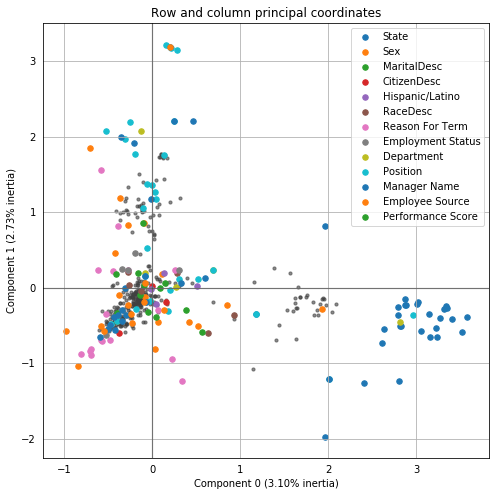

In [9]:
mca.plot_coordinates(df_obj, show_column_labels=False, figsize=(8, 8))
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [ ]:
encoded = pd.get_dummies(df_obj, drop_first=True)

### Reduce the one hot encoded categorical features down to two dimensions using MCA.

In [ ]:
mca2 = model.fit(encoded)

In [ ]:
mca2

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

### Plot the coordinates of each resulting dimension.

ZeroDivisionError: ignored

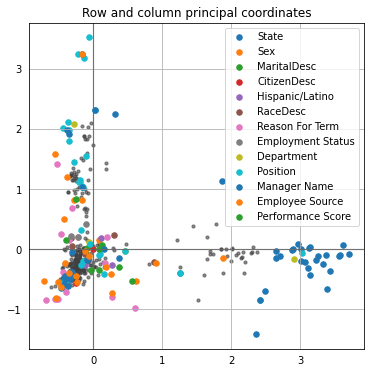

In [ ]:
mca2.plot_coordinates(encoded, show_column_labels=False)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [ ]:
model = prince.FAMD(n_components=2)
famd = model.fit(df)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

No handles with labels found to put in legend.


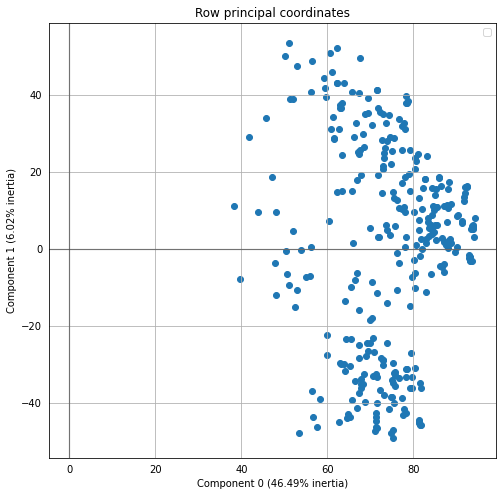

In [ ]:
famd.plot_row_coordinates(df, figsize=(8, 8))
plt.show()